In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
weather = pd.read_csv("C:/Users/MUZAM/Downloads/weatherdata.csv", index_col="Date")
weather = weather.ffill()
weather

,TAVG,TMAX,TMIN,PRCP
Date,,,,
01-01-1980,75,NaN,68.0,0.00
02-01-1980,74,84.0,66.0,0.00
03-01-1980,76,84.0,66.0,0.00
04-01-1980,76,86.0,68.0,0.00
05-01-1980,77,84.0,70.0,0.00
...,...,...,...,...
28-06-2023,90,96.0,82.0,0.00
29-06-2023,88,99.0,82.0,0.00
30-06-2023,89,100.0,80.0,0.04


In [59]:
weather = weather.ffill()
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '2023-06-23', '2023-06-24', '2023-06-25', '2023-06-26',
               '2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30',
               '2023-01-07', '2023-02-07'],
              dtype='datetime64[ns]', name='Date', length=15832, freq=None)

In [60]:
weather["target"]=weather.shift(-1)["TMAX "]
weather

,TAVG,TMAX,TMIN,PRCP,target
Date,,,,,
1980-01-01,75,NaN,68.0,0.00,84.0
1980-02-01,74,84.0,66.0,0.00,84.0
1980-03-01,76,84.0,66.0,0.00,86.0
1980-04-01,76,86.0,68.0,0.00,84.0
1980-05-01,77,84.0,70.0,0.00,84.0
...,...,...,...,...,...
2023-06-28,90,96.0,82.0,0.00,99.0
2023-06-29,88,99.0,82.0,0.00,100.0
2023-06-30,89,100.0,80.0,0.04,100.0


In [61]:
weather = weather.fillna(weather.mean())
weather

,TAVG,TMAX,TMIN,PRCP,target
Date,,,,,
1980-01-01,75,92.700335,68.0,0.00,84.000000
1980-02-01,74,84.000000,66.0,0.00,84.000000
1980-03-01,76,84.000000,66.0,0.00,86.000000
1980-04-01,76,86.000000,68.0,0.00,84.000000
1980-05-01,77,84.000000,70.0,0.00,84.000000
...,...,...,...,...,...
2023-06-28,90,96.000000,82.0,0.00,99.000000
2023-06-29,88,99.000000,82.0,0.00,100.000000
2023-06-30,89,100.000000,80.0,0.04,100.000000


In [62]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
X_train = np.array([[weather['TMAX '][i], weather['TAVG'][i]] for i in range(len(weather['TMAX ']))])
y_train = np.array(weather['TMIN'])
model = LinearRegression()
model.fit(X_train, y_train)
X_test = np.array([[weather['TMAX '][i], weather['TAVG'][i]] for i in range(len(weather['TMAX ']))])
y_pred = model.predict(X_test)
diff = y_pred - y_train
df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_train, 'diff': diff})
print("Predicted labels:", y_pred)
print(df)

Predicted labels: [68.19184175 67.79607106 69.67651582 ... 80.89815486 80.89815486
 77.26242182]
       Predicted  Actual      diff
0      68.191842    68.0  0.191842
1      67.796071    66.0  1.796071
2      69.676516    66.0  3.676516
3      69.551359    68.0  1.551359
4      70.616738    70.0  0.616738
...          ...     ...       ...
15827  82.088690    82.0  0.088690
15828  80.020511    82.0 -1.979489
15829  80.898155    80.0  0.898155
15830  80.898155    82.0 -1.101845
15831  77.262422    82.0 -4.737578

[15832 rows x 3 columns]


In [63]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 5.131933819099868
Root Mean Squared Error: 2.2653771913524396


In [64]:
from sklearn.metrics import mean_absolute_error ,r2_score

# Calculate mean absolute error
mae = mean_absolute_error(y_train, y_pred)

# Print the mean absolute error
print("Mean Absolute Error:", mae)


Mean Absolute Error: 1.7467933586471664


In [65]:
r2=r2_score(y_train,y_pred)
print("R2 score:",r2)

R2 score: 0.7683861721886572


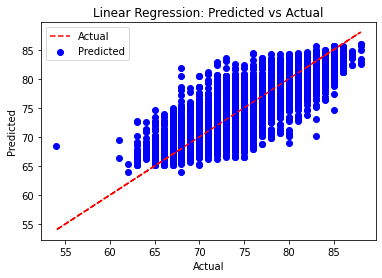

In [67]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(y_train, y_pred, color='blue', label='Predicted')
plt.plot(y_train, y_train, color='red', linestyle='--', label='Actual')

# Add labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Predicted vs Actual')

# Show the legend
plt.legend()

# Display the scatter plot
plt.show()
